
## 1. Introduction
INSAID Telecom, one of the leading telecom players, understands that customizing offering is very important for its business to stay competitive.

Currently, INSAID Telecom is seeking to leverage behavioral data from more than 60% of the 50 million mobile devices active daily in India to help its clients better understand and interact with their audiences.

In this consulting project, we are expected to build a dashboard to understand user's demographic characteristics based on their mobile usage, geolocation, and mobile device properties.

This analysis report will help millions of developers and brand advertisers around the world pursue data-driven marketing efforts which are relevant to their users and catered to their preferences.

## 2. Import the packages and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
%matplotlib inline

### Read the data from gender_age_train table

In [3]:
# read gender_age_train

gender_age = pd.read_csv("data\gender_age_train.csv")

gender_age.head()

Unnamed: 0            device_id gender  age   group
0           0 -8076087639492063270      M   35  M32-38
1           1 -2897161552818060146      M   35  M32-38
2           2 -8260683887967679142      M   35  M32-38
3           3 -4938849341048082022      M   30  M29-31
4           4   245133531816851882      M   30  M29-31

In [4]:
gender_age.drop('Unnamed: 0', axis=1, inplace=True)

gender_age.head()

device_id gender  age   group
0 -8076087639492063270      M   35  M32-38
1 -2897161552818060146      M   35  M32-38
2 -8260683887967679142      M   35  M32-38
3 -4938849341048082022      M   30  M29-31
4   245133531816851882      M   30  M29-31

### Data Cleaning 

### Male and Female count in gender_age_train table

In [5]:
gender_age.gender.value_counts()

M    47904
F    26741
Name: gender, dtype: int64

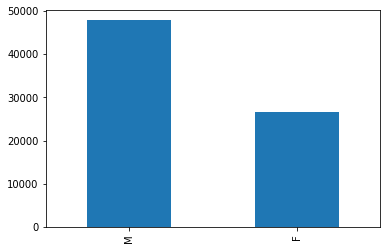

In [6]:
# Count of Male and Female
gender_age.gender.value_counts().plot(kind='bar')

In [7]:
gender_age.columns

Index(['device_id', 'gender', 'age', 'group'], dtype='object')

In [8]:
gender_age.group.unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

In [9]:
gender_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


### Replacing all the negative device_id

In [10]:
# replacing all negative device id.

gender_age.device_id = abs(gender_age.device_id)
gender_age

device_id gender  age   group
0      8076087639492063270      M   35  M32-38
1      2897161552818060146      M   35  M32-38
2      8260683887967679142      M   35  M32-38
3      4938849341048082022      M   30  M29-31
4       245133531816851882      M   30  M29-31
5      1297074871525174196      F   24  F24-26
6       236877999787307864      M   36  M32-38
7      8098239495777311881      M   38  M32-38
8       176515041953473526      M   33  M32-38
9      1596610250680140042      F   36  F33-42
10     9032155484127182494      M   31  M29-31
11     7477216237379271436      F   37  F33-42
12     2478205222798310601      F   28  F27-28
13     6352067998666467520      M   32  M32-38
14     7605360767281960867      M   48    M39+
15     1508636020748379883      F   28  F27-28
16     4380872794486415327      M   38  M32-38
17     1039701474753771322      M   38  M32-38
18     6876541075223249434      M   75    M39+
19     6287938418661076759      M   33  M32-38
20     6029676723224952628      F   39  F33-42
21     8026504930081700361      M   25  M23-26
22     1118970699362079126      M   24  M23-26
23     7271319853104672050      M   27  M27-28
24     9216966316587614491      M   29  M29-31
25     4913644674161904021      M   34  M32-38
26     2313145512701915151      M   34  M32-38
27     4309468945717577632      F   36  F33-42
28     4547337748907986143      M   37  M32-38
29     7216269352973401877      M   37  M32-38
...                    ...    ...  ...     ...
74615  7826033719277536366      M   28  M27-28
74616  8939634378631061484      M   31  M29-31
74617  1676125742207316285      F   28  F27-28
74618  2627933310180294504      M   31  M29-31
74619  7176422141809079294      M   23  M23-26
74620   877731366874189491      M   22    M22-
74621  1324027033843938692      M   22    M22-
74622  3569962198902678507      F   59    F43+
74623  2032262288045492186      F   29  F29-32
74624  6220019934264142137      M   29  M29-31
74625  4071460957162948519      F   27  F27-28
74626  8012242415081116163      F   30  F29-32
74627  7513478293429751074      F   56    F43+
74628  2918022610076499795      M   26  M23-26
74629   442105793738318663      M   35  M32-38
74630  2510601842775405069      F   22    F23-
74631  2572857383593438598      F   21    F23-
74632  5804749754315732086      M   33  M32-38
74633  4229815843211107303      M   53    M39+
74634  8331157719771660970      M   53    M39+
74635  1728576663562073800      M   38  M32-38
74636  8116314513428390753      M   25  M23-26
74637  3539330294838027409      M   25  M23-26
74638  5645813107043557722      F   51    F43+
74639  4752726726975186730      M   26  M23-26
74640  4682031842235089751      M   30  M29-31
74641  9178703742877135986      M   30  M29-31
74642   180946546684162312      M   20    M22-
74643  1390702386071991851      M   37  M32-38
74644    89181010588227347      M   25  M23-26

[74645 rows x 4 columns]

#### Checking the NULL values in gender_age_train table 

There are no null values present in gender_age_train

In [11]:
#checking null values

gender_age.isna().count()

device_id    74645
gender       74645
age          74645
group        74645
dtype: int64

In [12]:
# Count the unique device_id

gender_age.device_id.nunique()

74645

#### There are 12 unique age groups present in the data ranging from age 22- to 43+ years

In [13]:
# count the unique age group

gender_age.group.nunique()

12

In [14]:
gender_age.group.unique()

array(['M32-38', 'M29-31', 'F24-26', 'F33-42', 'F27-28', 'M39+', 'M23-26',
       'M27-28', 'M22-', 'F43+', 'F23-', 'F29-32'], dtype=object)

In [15]:
gender_age.shape

(74645, 4)

### Read the phone_brand table

In [16]:
# read phone_brand table

phone_brand = pd.read_csv("data\phone_brand_device_model.csv")

phone_brand.head()

Unnamed: 0            device_id phone_brand device_model
0           0  1877775838486905855        vivo          Y13
1           1 -3766087376657242966          小米         V183
2           2 -6238937574958215831        OPPO          R7s
3           3  8973197758510677470          三星        A368t
4           4 -2015528097870762664          小米      红米Note2

It has 87726 records with no null values and have information about device_id,phone_brand,device_model

In [17]:
phone_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 4 columns):
Unnamed: 0      87726 non-null int64
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(2), object(2)
memory usage: 2.7+ MB


### There are no null values present

In [18]:
#checking null values

phone_brand.isna().count()

Unnamed: 0      87726
device_id       87726
phone_brand     87726
device_model    87726
dtype: int64

In [19]:
phone_brand.shape

(87726, 4)

#### Joining the gender_age_train and phone_brand table based on device_id column

In [20]:
gender_Phone_brand = pd.merge(gender_age,phone_brand,on = 'device_id',how='inner')

gender_Phone_brand.head(10)

device_id gender  age   group  Unnamed: 0 phone_brand  \
0   245133531816851882      M   30  M29-31       13110       SUGAR   
1   236877999787307864      M   36  M32-38       68989          酷派   
2   176515041953473526      M   33  M32-38       13112          华为   
3  1596610250680140042      F   36  F33-42       67545          三星   
4  9032155484127182494      M   31  M29-31       77024          华为   
5  7477216237379271436      F   37  F33-42       56028          华为   
6  2478205222798310601      F   28  F27-28       67152          三星   
7  6352067998666467520      M   32  M32-38       13113          三星   
8  1508636020748379883      F   28  F27-28       13114          三星   
9  4380872794486415327      M   38  M32-38       13115          三星   

    device_model  
0           时尚手机  
1             F2  
2          G610S  
3      Galaxy S4  
4         Mate 7  
5       荣耀6 plus  
6  Galaxy Note 3  
7      Galaxy S3  
8      Galaxy S3  
9      Galaxy S3

In [21]:
gender_Phone_brand.shape

(37223, 7)

##### We have some phone brands which have chineese names and can not readable . So creating a dictionary map to map the chineese names to english name.

In [22]:
# create dictionary to map phone_brand symbols to English mapping

phone_brand_map = {'华为':'Huawei','小米':'Xiaomi','三星':'Samsung','vivo':'vivo','OPPO':'OPPO','魅族':'Meizu','酷派':'Coolpad','乐视':'LeEco','联想':'Lenovo','HTC':'HTC'}

phone_brand_map

{'华为': 'Huawei',
 '小米': 'Xiaomi',
 '三星': 'Samsung',
 'vivo': 'vivo',
 'OPPO': 'OPPO',
 '魅族': 'Meizu',
 '酷派': 'Coolpad',
 '乐视': 'LeEco',
 '联想': 'Lenovo',
 'HTC': 'HTC'}

#### Function to map all the chinese phone_brands to corresponding English names.

In [23]:
# map phone_brand chinese name to English name

def getBrandValue(symbol):
    '''
    Function to get the Brand value based on symbol
    '''
    if symbol not in phone_brand_map:
        return symbol
    else:
        return phone_brand_map[symbol]

In [24]:
# apply the function to column

gender_Phone_brand['EnglishBrandName'] = gender_Phone_brand.apply(lambda x:getBrandValue(x['phone_brand']),axis=1)

gender_Phone_brand

device_id gender  age   group  Unnamed: 0 phone_brand  \
0       245133531816851882      M   30  M29-31       13110       SUGAR   
1       236877999787307864      M   36  M32-38       68989          酷派   
2       176515041953473526      M   33  M32-38       13112          华为   
3      1596610250680140042      F   36  F33-42       67545          三星   
4      9032155484127182494      M   31  M29-31       77024          华为   
5      7477216237379271436      F   37  F33-42       56028          华为   
6      2478205222798310601      F   28  F27-28       67152          三星   
7      6352067998666467520      M   32  M32-38       13113          三星   
8      1508636020748379883      F   28  F27-28       13114          三星   
9      4380872794486415327      M   38  M32-38       13115          三星   
10     6287938418661076759      M   33  M32-38       85956          小米   
11     8026504930081700361      M   25  M23-26       13117          小米   
12     1118970699362079126      M   24  M23-26       13118          魅族   
13     2313145512701915151      M   34  M32-38       13121        vivo   
14     4309468945717577632      F   36  F33-42       73793          三星   
15     7630241409816671260      M   35  M32-38       53566        vivo   
16     7106922851105968241      M   22    M22-       13123          天语   
17     5886404762741543631      M   37  M32-38       68794          小米   
18     3444770318780911055      M   36  M32-38       13125          三星   
19     3549658489155683094      M   26  M23-26       77532        OPPO   
20     3014072209520807550      M   28  M27-28       68422          魅族   
21     6870382681059864892      M   29  M29-31       13133          小米   
22     6677393742805480020      M   31  M29-31       74906          酷派   
23     1865480732945072123      M   31  M29-31       81651          酷派   
24      336916678843446187      F   36  F33-42       13134          三星   
25      670584488453511085      F   36  F33-42       13135          小米   
26     5874501925603975585      M   38  M32-38       59697          华为   
27     3098621662950438701      M   31  M29-31       58865        vivo   
28     6223951438363242934      M   28  M27-28       13142          小米   
29     5938577683122528158      M   48    M39+       13147          三星   
...                    ...    ...  ...     ...         ...         ...   
37193  9142061250736882284      F   28  F27-28       52732          小米   
37194  8760360510061416783      M   38  M32-38       52733         HTC   
37195   397016735179188936      M   52    M39+       57964          小米   
37196  5620443603680005134      F   31  F29-32       52736          小米   
37197  7713308859694505501      M   26  M23-26       52737          三星   
37198  5031327653177289618      M   32  M32-38       52739          华为   
37199  7041398722782024994      M   22    M22-       52864          小米   
37200  1069690787522952559      M   30  M29-31       70315          朵唯   
37201  2176233713743660686      F   22    F23-       81253          三星   
37202  1544087454490588295      M   27  M27-28       57645          华为   
37203   804805193693465712      M   30  M29-31       81909          小米   
37204  2835673032311494522      M   28  M27-28       52747          小米   
37205  3177897734565028992      M   30  M29-31       52748          三星   
37206  7913401700555773883      F   53    F43+       80971          三星   
37207  7826033719277536366      M   28  M27-28       52749          三星   
37208  8939634378631061484      M   31  M29-31       79647         TCL   
37209  1676125742207316285      F   28  F27-28       52750          华为   
37210  2627933310180294504      M   31  M29-31       52751          三星   
37211  7176422141809079294      M   23  M23-26       52752          小米   
37212  2032262288045492186      F   29  F29-32       52754          小米   
37213  8012242415081116163      F   30  F29-32       52756          三星   
37214  2918022610076499795      M   26  M23-26       64293          小米   
37215   4421057937383

#### There are no NULL values

In [25]:
#checking null values

gender_Phone_brand.isna().count()

device_id           37223
gender              37223
age                 37223
group               37223
Unnamed: 0          37223
phone_brand         37223
device_model        37223
EnglishBrandName    37223
dtype: int64

In [26]:
# Get unique phone brand

gender_Phone_brand.phone_brand.unique()

array(['SUGAR', '酷派', '华为', '三星', '小米', '魅族', 'vivo', '天语', 'OPPO', 'HTC',
       '努比亚', 'LG', 'TCL', '联想 ', '优米', '一加', '酷比魔方', '海信', '欧博信', '朵唯',
       '奇酷', '艾优尼', '锤子', '尼比鲁', '糯米', '优购', '乐视', '青橙', '酷比', '华硕',
       '摩托罗拉', '夏新', '维图', 'LOGO', '富可视', '乡米', '米奇', '语信', '亿通', '波导',
       '西米', '美图', '梦米', '飞秒', '先锋', '米歌', '德赛', '爱派尔', '中国移动', '至尊宝',
       '纽曼', '长虹', '普耐尔', '海尔', '百立丰', '酷珀', 'ZUK', '昂达', '小杨树', '基伍',
       '邦华', '贝尔丰', '诺亚信', 'E派', '欧奇', '诺基亚', 'MIL', '斐讯', '唯米', 'Lovme',
       '康佳', '白米', '黑米', '易派', '果米', '大可乐', '宝捷讯', '聆韵', '百加', '瑞米', '瑞高',
       '沃普丰', '台电', '大Q', '广信', '青葱', '摩乐', '欧新', '奥克斯', '谷歌', '蓝魔',
       '恒宇丰', '神舟', '丰米', '鲜米', '智镁', '欧比', '唯比', '飞利浦', '欧乐迪'],
      dtype=object)

### Data from events table

In [27]:
# read events data

events = pd.read_csv("data\events_data.csv")

events.head(10)

event_id     device_id            timestamp  longitude  latitude   city  \
0       1.0  2.918269e+16  2016-05-01 00:55:25  77.266049  28.68161  Delhi   
1    7104.0  2.918269e+16  2016-05-02 09:37:02  77.266049  28.68161  Delhi   
2   29661.0  2.918269e+16  2016-05-04 00:56:04  77.266049  28.68161  Delhi   
3   33133.0  2.918269e+16  2016-05-06 05:01:15  77.266049  28.68161  Delhi   
4   38980.0  2.918269e+16  2016-05-06 09:55:04  77.266049  28.68161  Delhi   
5   66398.0  2.918269e+16  2016-05-01 01:56:06  77.266049  28.68161  Delhi   
6   70894.0  2.918269e+16  2016-05-06 01:14:46  77.266049  28.68161  Delhi   
7   87185.0  2.918269e+16  2016-05-01 09:20:01  77.266049  28.68161  Delhi   
8   94644.0  2.918269e+16  2016-05-07 07:16:35  77.266049  28.68161  Delhi   
9  110018.0  2.918269e+16  2016-05-06 21:00:40  77.266049  28.68161  Delhi   

   state  
0  Delhi  
1  Delhi  
2  Delhi  
3  Delhi  
4  Delhi  
5  Delhi  
6  Delhi  
7  Delhi  
8  Delhi  
9  Delhi

In [28]:
events.isnull().sum()  # There are null values n device-id and logitude and latitude and state

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

In [29]:
gender_age.isnull().sum() # No Null values in gender_age table

device_id    0
gender       0
age          0
group        0
dtype: int64

In [30]:
gender_Phone_brand.isnull().sum() # No null values in gender_Phone_brand table

device_id           0
gender              0
age                 0
group               0
Unnamed: 0          0
phone_brand         0
device_model        0
EnglishBrandName    0
dtype: int64

In [31]:
llist = ['device_id','state','longitude','latitude']

#Display all the rows with null values in the dataset

events[events.isnull().any(axis=1)]

#events['device_id'].isnull().sum()

event_id     device_id            timestamp  longitude   latitude  \
16649     191851.0 -6.242501e+18  2016-05-02 05:50:53  77.293991  28.749820   
16836     341684.0 -6.242501e+18  2016-05-02 08:37:46  77.293991  28.749820   
17247     658755.0 -6.242501e+18  2016-05-02 10:10:57  77.293991  28.749820   
17339     720866.0 -6.242501e+18  2016-05-02 20:55:28  77.293991  28.749820   
17696     983707.0 -6.242501e+18  2016-05-03 10:25:17  77.293991  28.749820   
18431    1573296.0 -6.242501e+18  2016-05-02 08:31:43  77.293991  28.749820   
18452    1586268.0 -6.242501e+18  2016-05-02 18:23:25  77.293991  28.749820   
18454    1586328.0 -6.242501e+18  2016-05-02 18:25:36  77.293991  28.749820   
18504    1630796.0 -6.242501e+18  2016-05-02 00:15:24  77.293991  28.749820   
19349    2305375.0 -6.242501e+18  2016-05-02 05:14:54  77.293991  28.749820   
19457    2392812.0 -6.242501e+18  2016-05-02 10:10:10  77.293991  28.749820   
19531    2445939.0 -6.242501e+18  2016-05-02 08:16:21  77.293991  28.749820   
20226    2971151.0 -6.242501e+18  2016-05-03 11:25:12  77.293991  28.749820   
20254    2992608.0 -6.242501e+18  2016-05-02 09:26:25  77.293991  28.749820   
23808      72957.0           NaN  2016-05-03 06:10:14  77.303153  28.728888   
23820      78897.0           NaN  2016-05-02 11:25:47  77.303153  28.728888   
23831      94768.0           NaN  2016-05-02 17:39:12  77.303153  28.728888   
23852     127677.0           NaN  2016-05-01 10:06:53  77.303153  28.728888   
24093     442470.0           NaN  2016-05-07 09:03:18  77.303153  28.728888   
24102     454030.0           NaN  2016-05-01 15:50:10  77.303153  28.728888   
24184     568538.0           NaN  2016-05-02 06:13:38  77.303153  28.728888   
24284     678009.0           NaN  2016-05-02 13:29:10  77.303153  28.728888   
24537    1050434.0           NaN  2016-05-03 20:06:02  77.303153  28.728888   
24656    1224971.0           NaN  2016-05-07 10:19:24  77.303153  28.728888   
24846    1499580.0           NaN  2016-05-02 00:41:13  77.303153  28.728888   
24938    1605219.0           NaN  2016-05-02 11:47:22  77.303153  28.728888   
25007    1712794.0           NaN  2016-05-06 10:39:30  77.303153  28.728888   
25217    2045563.0           NaN  2016-05-05 07:43:20  77.303153  28.728888   
25304    2175559.0           NaN  2016-05-02 06:10:34  77.303153  28.728888   
25476    2409483.0           NaN  2016-05-06 18:31:03  77.303153  28.728888   
...            ...           ...                  ...        ...        ...   
3080081   497214.0           NaN  2016-05-03 07:51:27  75.992551  31.561747   
3080113   756233.0           NaN  2016-05-07 22:32:12  75.992551  31.561747   
3080151  1064891.0           NaN  2016-05-02 13:31:44  75.992551  31.561747   
3080163  1178005.0           NaN  2016-05-06 13:06:53  75.992551  31.561747   
3080172  1252035.0           NaN  2016-05-03 12:35:33  75.992551  31.561747   
3080198  1458419.0           NaN  2016-05-04 18:01:05  75.992551  31.561747   
3080209  1565147.0           NaN  2016-05-07 21:13:53  75.992551  31.561747   
3080231  1724313.0           NaN  2016-05-05 17:26:12  75.992551  31.561747   
3080242  1787536.0           NaN  2016-05-04 22:19:21  75.992551  31.561747   
3080286  2113651.0           NaN  2016-05-05 14:43:35  75.992551  31.561747   
3080318  2331656.0           NaN  2016-05-02 13:10:22  75.992551  31.561747   
3080386  2872799.0           NaN  2016-05-06 07:07:15  75.992551  31.561747   
3080414  3088541.0           NaN  2016-05-02 04:59:16  75.992551  31.561747   
3080439  3227383.0           NaN  2016-05-05 08:37:09  75.992551  31.561747   
3098537   118826.0           NaN  2016-05-06 22:05:48  73.169345  21.194283   
3098538   138984.0           NaN  2016-05-07 18:01:52  73.169345  21.194283   
3098572   392107.0           NaN  2016-05-06 17:08:36  73.169345  21.194283   
3098596   526238.0           NaN  2016-05-06 20:13:02  73.169345  21.194283   
3098628   755589.0           NaN  2016-05-04 21:56:13  73.16

In [32]:
# dispaly the data of selected states

states = ['MadhyaPradesh', 'Chhattisgarh', 'Uttaranchal', 'JammuandKashmir','Goa', 'Nagaland']

selectedStates = pd.DataFrame()
for index,value in enumerate(states):
    selectedStates=selectedStates.append(events[events.state == states[index]])
print(selectedStates)

          event_id     device_id            timestamp  longitude   latitude  \
2197849    10117.0 -5.323073e+18  2016-05-01 11:11:24  75.939543  22.769170   
2197850   112369.0 -5.323073e+18  2016-05-04 22:47:19  75.939543  22.769170   
2197851   139098.0 -5.323073e+18  2016-05-01 09:55:58  75.939543  22.769170   
2197852   190983.0 -5.323073e+18  2016-05-04 22:51:03  75.939543  22.769170   
2197853   249507.0 -5.323073e+18  2016-05-01 11:24:12  75.939543  22.769170   
2197854   331448.0 -5.323073e+18  2016-05-01 09:54:27  75.939543  22.769170   
2197855   508930.0 -5.323073e+18  2016-05-01 11:11:55  75.939543  22.769170   
2197856   814402.0 -5.323073e+18  2016-05-01 11:14:55  75.939543  22.769170   
2197857   814404.0 -5.323073e+18  2016-05-01 11:17:46  75.939543  22.769170   
2197858   842681.0 -5.323073e+18  2016-05-01 11:27:42  75.939543  22.769170   
2197859   899601.0 -5.323073e+18  2016-05-01 11:13:25  75.939543  22.769170   
2197860   899602.0 -5.323073e+18  2016-05-01 11:13:5

In [33]:
# Checking total number of rows in selected fives states
selectedStates.info()

# There are 258799 records present for selected states of MadhyaPradesh,Jammu Kashmir,Goa,Nag,Chhatisgarh and Uttaranchal

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261097 entries, 2197849 to 2458994
Data columns (total 7 columns):
event_id     261097 non-null float64
device_id    261046 non-null float64
timestamp    261097 non-null object
longitude    261034 non-null float64
latitude     261034 non-null float64
city         261097 non-null object
state        261097 non-null object
dtypes: float64(4), object(3)
memory usage: 15.9+ MB


In [34]:
#Checking null values in selected states
selectedStates.isnull().sum()

event_id      0
device_id    51
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

There are 51 rows null in selectedStates dataset

In [35]:
# Converting negative device_id to positive
selectedStates['device_id'] = np.abs(selectedStates['device_id'])

In [36]:
# Dropping rows with null device_id

selectedStates.dropna(subset=['device_id'],inplace = True)
selectedStates.isnull().sum()


event_id      0
device_id     0
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

### All missing values are belong to city "Indore" and state MadhyaPradesh

In [37]:
# Display rows with missing long and latitude

selectedStates[selectedStates.isnull().any(axis=1)]

# All missing values are belong to city "Indore" and state MadhyaPradesh

event_id     device_id            timestamp  longitude  latitude  \
2209280    98473.0  2.350979e+18  2016-05-01 13:26:19        NaN       NaN   
2209338   306267.0  2.350979e+18  2016-05-04 12:28:22        NaN       NaN   
2209342   325499.0  2.350979e+18  2016-05-03 00:04:38        NaN       NaN   
2209409   548071.0  2.350979e+18  2016-05-03 10:15:01        NaN       NaN   
2209447   670642.0  2.350979e+18  2016-05-01 09:39:47        NaN       NaN   
2209493   844848.0  2.350979e+18  2016-05-02 12:02:29        NaN       NaN   
2209510   896615.0  2.350979e+18  2016-05-01 09:22:15        NaN       NaN   
2209512   904180.0  2.350979e+18  2016-05-03 15:28:15        NaN       NaN   
2209655  1565626.0  2.350979e+18  2016-05-03 22:31:58        NaN       NaN   
2209667  1634714.0  2.350979e+18  2016-05-02 03:57:30        NaN       NaN   
2209732  1945373.0  2.350979e+18  2016-05-04 20:26:49        NaN       NaN   
2209776  2095096.0  2.350979e+18  2016-05-02 23:05:30        NaN       NaN   
2209789  2180897.0  2.350979e+18  2016-05-04 10:38:52        NaN       NaN   
2209804  2234686.0  2.350979e+18  2016-05-03 11:31:51        NaN       NaN   
2209827  2338055.0  2.350979e+18  2016-05-01 13:08:52        NaN       NaN   
2209828  2338514.0  2.350979e+18  2016-05-01 15:50:54        NaN       NaN   
2209844  2402811.0  2.350979e+18  2016-05-02 15:59:54        NaN       NaN   
2209886  2611498.0  2.350979e+18  2016-05-04 10:43:36        NaN       NaN   
2209950  2895516.0  2.350979e+18  2016-05-01 01:05:25        NaN       NaN   
2210006  3116310.0  2.350979e+18  2016-05-04 17:55:47        NaN       NaN   
2210038  3245107.0  2.350979e+18  2016-05-04 19:27:21        NaN       NaN   
2210859   153906.0  8.790560e+18  2016-05-05 15:44:35        NaN       NaN   
2210917   358653.0  8.790560e+18  2016-05-05 13:18:02        NaN       NaN   
2210921   376837.0  8.790560e+18  2016-05-05 13:54:29        NaN       NaN   
2210988   606369.0  8.790560e+18  2016-05-04 14:17:54        NaN       NaN   
2211026   763705.0  8.790560e+18  2016-05-04 08:55:07        NaN       NaN   
2211072   948465.0  8.790560e+18  2016-05-04 07:52:30        NaN       NaN   
2211089  1017749.0  8.790560e+18  2016-05-03 17:22:52        NaN       NaN   
2211091  1021674.0  8.790560e+18  2016-05-02 20:38:06        NaN       NaN   
2211234  1622109.0  8.790560e+18  2016-05-04 21:16:19        NaN       NaN   
...            ...           ...                  ...        ...       ...   
2211368  2151512.0  8.790560e+18  2016-05-07 11:41:40        NaN       NaN   
2211383  2192533.0  8.790560e+18  2016-05-03 19:54:48        NaN       NaN   
2211406  2259556.0  8.790560e+18  2016-05-06 08:42:42        NaN       NaN   
2211407  2265253.0  8.790560e+18  2016-05-04 13:38:11        NaN       NaN   
2211423  2326478.0  8.790560e+18  2016-05-07 11:36:43        NaN       NaN   
2211465  2503842.0  8.790560e+18  2016-05-06 00:06:45        NaN       NaN   
2211585  3028339.0  8.790560e+18  2016-05-05 14:32:56        NaN       NaN   
2211617  3164130.0  8.790560e+18  2016-05-03 22:55:22        NaN       NaN   
2211635  3247853.0  8.790560e+18  2016-05-02 21:09:19        NaN       NaN   
2231166   161055.0  3.738280e+18  2016-05-05 00:35:33        NaN       NaN   
2231224   373392.0  3.738280e+18  2016-05-02 11:00:38        NaN       NaN   
2231228   383438.0  3.738280e+18  2016-05-01 15:44:20        NaN       NaN   
2231295   674005.0  3.738280e+18  2016-05-07 10:53:27        NaN       NaN   
2231333   815518.0  3.738280e+18  2016-05-06 10:58:24        NaN       NaN   
2231379  1006744.0  3.738280e+18  2016-05-03 08:25:24        NaN       NaN   
2231396  1049018.0  3.738280e+18  2016-05-06 19:16:18        NaN       NaN   
2231398  1070998.0  3.738280e+18  2016-05-04 18:09:21        NaN       NaN   
2231541  1659115.0  3.738280e+18  2016-05-07 21:22:27        NaN       NaN   
2231553  1679955.0  3.738280e+18  2016-05-03 17:05:36        NaN       NaN   
2231618  1906628.0  3.738280e+18

In [38]:
#Filling missing longtitude and latitude of Indore , Madhya Pradesh
#https://www.latlong.net/search.php?keyword=indore
#Indore 22.719568	75.857727
#Indore 23.200001	77.080002

selectedStates.fillna({'longitude':'75.857727','latitude':'22.719568'},inplace=True)

selectedStates[selectedStates.isnull().any(axis=1)].sum()

# no more null values in Longitude and latitude

event_id     0.0
device_id    0.0
timestamp    0.0
longitude    0.0
latitude     0.0
city         0.0
state        0.0
dtype: float64

In [39]:
#!pip install folium


In [40]:
# Putting latitude and longitude into list

locations = selectedStates[['latitude', 'longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist

[[22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917000000001, 75.939543],
 [22.76917

In [41]:
#Plotting latitude and longitude using folium package
import folium as folium

# Initialize the map:
latitude = 22.746807
longitude = 75.935055
map = folium.Map(location=[latitude, longitude], zoom_start=12)

#plotting the selected longitude and latitude
for point in range(0, 500):
    folium.Marker(locationlist[point], popup=selectedStates['city']).add_to(map)
map


In [42]:
map2 = folium.Map(location=[22.80996, 75.919742], tiles='CartoDB dark_matter', zoom_start=10)

#marker_cluster = folium.MarkerCluster().add_to(map2)

for point in range(0, 500):
    folium.Marker(locationlist[point], popup=selectedStates['city']).add_to(map2)
map2

## Exploratory Data Analysis - EDA

### 1. Distribution of Users(device_id) across States.

In [43]:
# Displaying different users across States [ Chattisgarh , Goa,Nag,JammuandKashmir,MadhyaPradesh,Uttaranchal]

selectedStates.groupby('state').device_id.nunique()

state
Chhattisgarh        400
Goa                  76
JammuandKashmir     236
MadhyaPradesh      3220
Nagaland            107
Uttaranchal         258
Name: device_id, dtype: int64

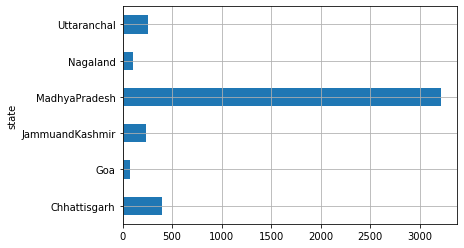

In [44]:
# plot the above distribution 

selectedStates.groupby('state')['device_id'].nunique().plot(kind='barh',grid = True)

### 2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).


#### Figure out the top 10 most popular phone brands

In [45]:
# Displaying users across top 10 phone brands

Top10Brands = pd.DataFrame(gender_Phone_brand.groupby('EnglishBrandName')['device_id'].nunique().sort_values(ascending=False).head(10))

Top10Brands

device_id
EnglishBrandName           
Xiaomi                 9195
Samsung                8123
Huawei                 6444
vivo                   3241
OPPO                   2874
Meizu                  2353
Coolpad                1658
HTC                     557
联想                      405
LeEco                   358

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24819 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32852 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24819 missing from current font.
  font.set_text(s, 0, flags=flags)


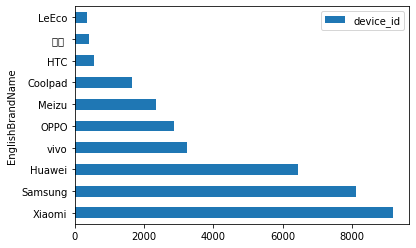

In [46]:
# Plotting Users across top 10 brands

Top10Brands.plot(kind = 'barh')

## 3. Distribution of Users across Gender.

The number of MALE users are double that of FEMALE

In [47]:
# Gender wise distribution

GenderDistribution = pd.DataFrame(gender_Phone_brand.groupby('gender')['device_id'].nunique())
 
GenderDistribution

device_id
gender           
F           13373
M           23850

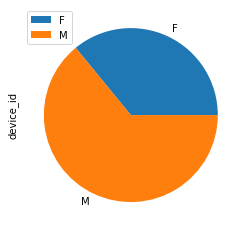

In [48]:
# Plotting Gender distribution

GenderDistribution.plot(kind='pie',y='device_id')

## 4.  Distribution of Users across Age Segments.

In [49]:
# Filtering the Age segment distribution

gender_Phone_brand.groupby('group')['device_id'].nunique()

group
F23-      2529
F24-26    2145
F27-28    1525
F29-32    2338
F33-42    2743
F43+      2093
M22-      3706
M23-26    4786
M27-28    2698
M29-31    3664
M32-38    4723
M39+      4273
Name: device_id, dtype: int64

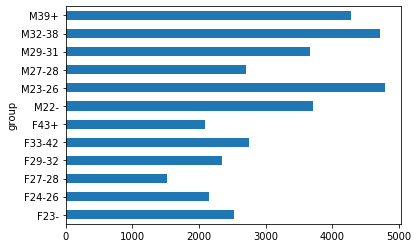

In [50]:
# Plotting the Age-segments

gender_Phone_brand.groupby('group')['device_id'].nunique().plot(kind='barh')

There are different 12 age groups. For Males its from M23- to M39+ and for Female , its F22- to F43+ . So to make them same age groups across Male and Female, We need to make new common groups based on age column . Defining a function to map to new age segments based on customer age column.

In [51]:
# gender_Phone_brand

In [113]:
# function to map to common age-segment based on age column, irrespective of gender
# common six Age segment are - 22- ,23-26,27-28,29-32,33-42,43+

def getAgeSegmentMapping(age):
    '''
    The function used to retrive the age segment based on the input age. 
    '''
    segment = 'NA'
    
    if (age == 22 or age < 22):
        segment = '22-'
    elif age in range(23,27):
        segment = '23-26'
    elif age in range(27,29):
        segment = '27-28'
    elif age in range(29,33):
        segment = '29-32'
    elif age  in range(33,43):
        segment = '33-42'
    elif (age == 43 or age > 43 ):
        segment = '43+' 
                   
    return segment

In [54]:
gender_Phone_brand['AgeSegment'] = gender_Phone_brand.age.apply(lambda x:getAgeSegmentMapping(x))
gender_Phone_brand.head()

device_id gender  age   group  Unnamed: 0 phone_brand  \
0   245133531816851882      M   30  M29-31       13110       SUGAR   
1   236877999787307864      M   36  M32-38       68989          酷派   
2   176515041953473526      M   33  M32-38       13112          华为   
3  1596610250680140042      F   36  F33-42       67545          三星   
4  9032155484127182494      M   31  M29-31       77024          华为   

  device_model EnglishBrandName AgeSegment  
0         时尚手机            SUGAR      29-32  
1           F2          Coolpad      33-42  
2        G610S           Huawei      33-42  
3    Galaxy S4          Samsung      33-42  
4       Mate 7           Huawei      29-32

In [55]:
# grouping users based on common age segments

gender_Phone_brand.groupby('AgeSegment')['device_id'].nunique()

AgeSegment
22-      5667
23-26    7499
27-28    4223
29-32    6889
33-42    8002
43+      4943
Name: device_id, dtype: int64

### 5. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.

In [56]:
top_brands_list = gender_Phone_brand.EnglishBrandName.value_counts()[:10].reset_index()["index"].tolist()
top_brands_list

['Xiaomi',
 'Samsung',
 'Huawei',
 'vivo',
 'OPPO',
 'Meizu',
 'Coolpad',
 'HTC',
 '联想 ',
 'LeEco']

In [57]:
# Get the top 10 phone brand filtered records.
gender_Phone_brand_filtered = gender_Phone_brand[gender_Phone_brand.EnglishBrandName.isin(top_brands_list)]

### 5.1 Phone brands vs Gender

In [58]:
# Phone brands Vs Gender data

phone_brand_gender_report = gender_Phone_brand_filtered[['EnglishBrandName', 'gender']]
phone_brand_gender_report_group = pd.pivot_table(phone_brand_gender_report,index=["EnglishBrandName"],columns=["gender"],aggfunc=[len])
phone_brand_gender_report_group

len      
gender               F     M
EnglishBrandName            
Coolpad            599  1059
HTC                202   355
Huawei            2228  4216
LeEco              120   238
Meizu              747  1606
OPPO              1154  1720
Samsung           3035  5088
Xiaomi            3236  5959
vivo              1244  1997
联想                 123   282

Text(0.5, 1.0, 'Distribution of Male & Female users across Phone Brands')

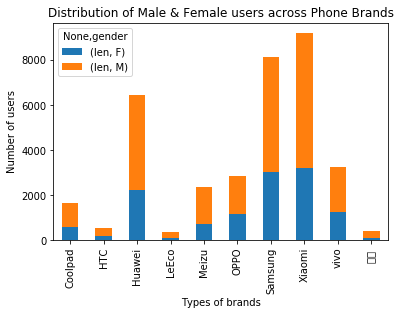

In [59]:
#plotting phone_brand Vs gender

phone_brand_gender_report_group.plot.bar(stacked=True)
plt.xlabel("Types of brands")
plt.ylabel("Number of users")
plt.title("Distribution of Male & Female users across Phone Brands")

### 5.2 Phone brands vs Age Segments

In [60]:
phone_brand_agesegment_report = gender_Phone_brand_filtered[['EnglishBrandName', 'AgeSegment']]
phone_brand_agesegment_report_group = pd.pivot_table(phone_brand_agesegment_report,index=["EnglishBrandName"],columns=["AgeSegment"],aggfunc=[len])
phone_brand_agesegment_report_group

len                              
AgeSegment         22- 23-26 27-28 29-32 33-42   43+
EnglishBrandName                                    
Coolpad            241   326   186   286   380   239
HTC                 96   112    56   101   119    73
Huawei             837  1205   679  1270  1507   946
LeEco               45    75    40    76    77    45
Meizu              450   539   294   399   431   240
OPPO               549   607   353   507   534   324
Samsung           1048  1514   928  1543  1868  1222
Xiaomi            1390  1930  1089  1708  1924  1154
vivo               625   712   338   564   632   370
联想                  65    88    43    69    75    65

Text(0.5, 1.0, 'Distribution of age segment across Phone Brands')

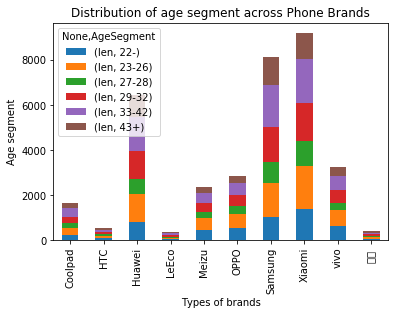

In [61]:
# PLotting phone_brand Vs Age Segment

phone_brand_agesegment_report_group.plot.bar(stacked=True)
plt.xlabel("Types of brands")
plt.ylabel("Age segment")
plt.title("Distribution of age segment across Phone Brands")

### 5.3 Phone brands vs States

In [62]:
# selectedStates.isnull().sum()
phone_brand['EnglishBrandName'] = phone_brand.apply(lambda x:getBrandValue(x['phone_brand']),axis=1)
Phone_brand_states = pd.merge(selectedStates,phone_brand,on = 'device_id',how='inner')

Phone_brand_states_report = Phone_brand_states[['EnglishBrandName', 'state']]
Phone_brand_states_report_group = pd.pivot_table(Phone_brand_states_report,index=["EnglishBrandName"],columns=["state"],aggfunc=[len])
Phone_brand_states_report_group

len                       
state            Chhattisgarh MadhyaPradesh Nagaland
EnglishBrandName                                    
HTC                       1.0           NaN      NaN
Huawei                    1.0           NaN     49.0
Samsung                   NaN         543.0      7.0
Xiaomi                    NaN         733.0      NaN
vivo                      NaN         132.0      NaN

Text(0.5, 1.0, 'Distribution of states across Phone Brands')

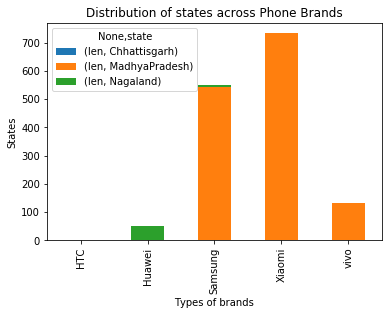

In [63]:
Phone_brand_states_report_group.plot.bar(stacked=True)
plt.xlabel("Types of brands")
plt.ylabel("States")
plt.title("Distribution of states across Phone Brands")

### 6. Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands).

gender_Phone_brand.EnglishBrandName.value_counts()[:10].reset_index()["index"]

### 6.1 Gender Vs States

we need to merge two tables.

1. gender_age_train_data table
2. events_data table

In [64]:
gender_age.head()

device_id gender  age   group
0  8076087639492063270      M   35  M32-38
1  2897161552818060146      M   35  M32-38
2  8260683887967679142      M   35  M32-38
3  4938849341048082022      M   30  M29-31
4   245133531816851882      M   30  M29-31

In [65]:
events.head()

event_id     device_id            timestamp  longitude  latitude   city  \
0       1.0  2.918269e+16  2016-05-01 00:55:25  77.266049  28.68161  Delhi   
1    7104.0  2.918269e+16  2016-05-02 09:37:02  77.266049  28.68161  Delhi   
2   29661.0  2.918269e+16  2016-05-04 00:56:04  77.266049  28.68161  Delhi   
3   33133.0  2.918269e+16  2016-05-06 05:01:15  77.266049  28.68161  Delhi   
4   38980.0  2.918269e+16  2016-05-06 09:55:04  77.266049  28.68161  Delhi   

   state  
0  Delhi  
1  Delhi  
2  Delhi  
3  Delhi  
4  Delhi

In [66]:
# Merging both the above tables based on "inner" join
gender_age_events_report = pd.merge(selectedStates, gender_age, on = 'device_id', how='inner')
gender_age_events_report.head()

event_id     device_id            timestamp longitude latitude    city  \
0   10441.0  5.334703e+17  2016-05-03 11:25:00   75.9122  22.7319  Indore   
1   13461.0  5.334703e+17  2016-05-04 13:12:14   75.9122  22.7319  Indore   
2   18882.0  5.334703e+17  2016-05-03 17:15:16   75.9122  22.7319  Indore   
3   18997.0  5.334703e+17  2016-05-03 17:16:14   75.9122  22.7319  Indore   
4   43964.0  5.334703e+17  2016-05-04 12:45:37   75.9122  22.7319  Indore   

           state gender  age   group  
0  MadhyaPradesh      F   38  F33-42  
1  MadhyaPradesh      F   38  F33-42  
2  MadhyaPradesh      F   38  F33-42  
3  MadhyaPradesh      F   38  F33-42  
4  MadhyaPradesh      F   38  F33-42

In [67]:
distribution_gender_across_state = pd.DataFrame(gender_age_events_report.groupby("state")["gender"].value_counts().reset_index(name='count'))

distribution_gender_across_state



state gender  count
0     Chhattisgarh      M     37
1     Chhattisgarh      F     13
2              Goa      M      7
3  JammuandKashmir      M     78
4    MadhyaPradesh      M   1416
5    MadhyaPradesh      F   1217
6         Nagaland      F     49
7         Nagaland      M      7

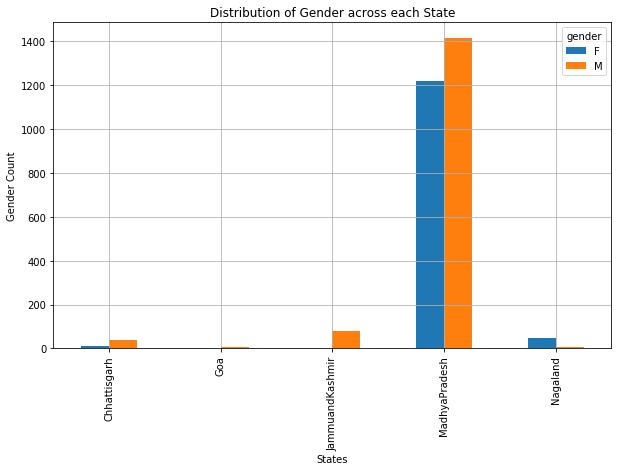

In [68]:

distribution_gender_across_state.pivot_table(index='state', columns='gender', values='count', aggfunc='sum').plot.bar(grid = True, figsize = (10, 6))
plt.xlabel("States")
plt.ylabel("Gender Count")
plt.title("Distribution of Gender across each State")
plt.show()

### 6.2 Gender Vs Age Segment

In [69]:
gender_Phone_brand.head()

device_id gender  age   group  Unnamed: 0 phone_brand  \
0   245133531816851882      M   30  M29-31       13110       SUGAR   
1   236877999787307864      M   36  M32-38       68989          酷派   
2   176515041953473526      M   33  M32-38       13112          华为   
3  1596610250680140042      F   36  F33-42       67545          三星   
4  9032155484127182494      M   31  M29-31       77024          华为   

  device_model EnglishBrandName AgeSegment  
0         时尚手机            SUGAR      29-32  
1           F2          Coolpad      33-42  
2        G610S           Huawei      33-42  
3    Galaxy S4          Samsung      33-42  
4       Mate 7           Huawei      29-32

In [70]:
#Filtering the gender distibution across Age Segement

distribution_of_gender_across_AgeSegment = pd.DataFrame(gender_Phone_brand.groupby("AgeSegment")["gender"].value_counts().reset_index(name='count'))
distribution_of_gender_across_AgeSegment

AgeSegment gender  count
0         22-      M   3706
1         22-      F   1961
2       23-26      M   4786
3       23-26      F   2713
4       27-28      M   2698
5       27-28      F   1525
6       29-32      M   4551
7       29-32      F   2338
8       33-42      M   5259
9       33-42      F   2743
10        43+      M   2850
11        43+      F   2093

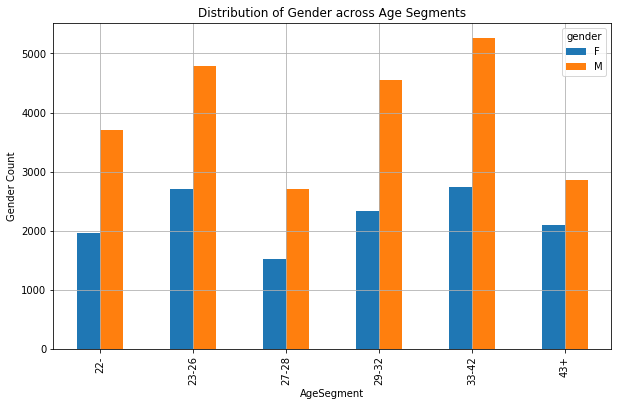

In [71]:
# plotting Distribution of Gender across Age Segment

distribution_of_gender_across_AgeSegment.pivot_table(index='AgeSegment', columns='gender', values='count', aggfunc='sum').plot.bar(grid = True, figsize = (10, 6))
plt.xlabel("AgeSegment")
plt.ylabel("Gender Count")
plt.title("Distribution of Gender across Age Segments")
plt.show()

### 6.3 Gender Vs Phone Brand(Consider only 10 Most used Phone Brands)

In [72]:
gender_Phone_brand.head()

device_id gender  age   group  Unnamed: 0 phone_brand  \
0   245133531816851882      M   30  M29-31       13110       SUGAR   
1   236877999787307864      M   36  M32-38       68989          酷派   
2   176515041953473526      M   33  M32-38       13112          华为   
3  1596610250680140042      F   36  F33-42       67545          三星   
4  9032155484127182494      M   31  M29-31       77024          华为   

  device_model EnglishBrandName AgeSegment  
0         时尚手机            SUGAR      29-32  
1           F2          Coolpad      33-42  
2        G610S           Huawei      33-42  
3    Galaxy S4          Samsung      33-42  
4       Mate 7           Huawei      29-32

In [73]:
#distribution of gender across phone brands

distribution_of_gender_across_phone_brand = pd.DataFrame(gender_Phone_brand.groupby("gender")["EnglishBrandName"].value_counts().reset_index(name='count'))
distribution_of_gender_across_phone_brand

gender EnglishBrandName  count
0        F           Xiaomi   3236
1        F          Samsung   3035
2        F           Huawei   2228
3        F             vivo   1244
4        F             OPPO   1154
5        F            Meizu    747
6        F          Coolpad    599
7        F              HTC    202
8        F              联想     123
9        F            LeEco    120
10       F              努比亚     71
11       F               LG     52
12       F               朵唯     48
13       F               锤子     47
14       F             中国移动     41
15       F               优米     39
16       F               海信     38
17       F               奇酷     31
18       F              TCL     24
19       F               语信     22
20       F               一加     21
21       F               天语     20
22       F               美图     19
23       F             酷比魔方     12
24       F               酷比     10
25       F              富可视      9
26       F              艾优尼      9
27       F             摩托罗拉      8
28       F               梦米      8
29       F              贝尔丰      8
..     ...              ...    ...
149      M               唯米      3
150      M               大Q      3
151      M              大可乐      3
152      M               易派      3
153      M               聆韵      3
154      M            Lovme      2
155      M            SUGAR      2
156      M               基伍      2
157      M              宝捷讯      2
158      M               德赛      2
159      M               斐讯      2
160      M               昂达      2
161      M              普耐尔      2
162      M               果米      2
163      M               欧新      2
164      M               神舟      2
165      M               米奇      2
166      M               蓝魔      2
167      M              MIL      1
168      M               丰米      1
169      M               台电      1
170      M               唯比      1
171      M               广信      1
172      M              恒宇丰      1
173      M               摩乐      1
174      M               智镁      1
175      M              欧乐迪      1
176      M               欧比      1
177      M              飞利浦      1
178      M               鲜米      1

[179 rows x 3 columns]

In [74]:
top_brands_list

['Xiaomi',
 'Samsung',
 'Huawei',
 'vivo',
 'OPPO',
 'Meizu',
 'Coolpad',
 'HTC',
 '联想 ',
 'LeEco']

In [75]:
# Filtering the Gender distrubtion across top 10 phone brands

distribution_gender_across_phone_brand = pd.DataFrame()
for index,value in enumerate(top_brands_list):
    distribution_gender_across_phone_brand=distribution_of_gender_across_phone_brand[distribution_of_gender_across_phone_brand.EnglishBrandName.isin(top_brands_list)]

distribution_gender_across_phone_brand

gender EnglishBrandName  count
0       F           Xiaomi   3236
1       F          Samsung   3035
2       F           Huawei   2228
3       F             vivo   1244
4       F             OPPO   1154
5       F            Meizu    747
6       F          Coolpad    599
7       F              HTC    202
8       F              联想     123
9       F            LeEco    120
86      M           Xiaomi   5959
87      M          Samsung   5088
88      M           Huawei   4216
89      M             vivo   1997
90      M             OPPO   1720
91      M            Meizu   1606
92      M          Coolpad   1059
93      M              HTC    355
94      M              联想     282
95      M            LeEco    238

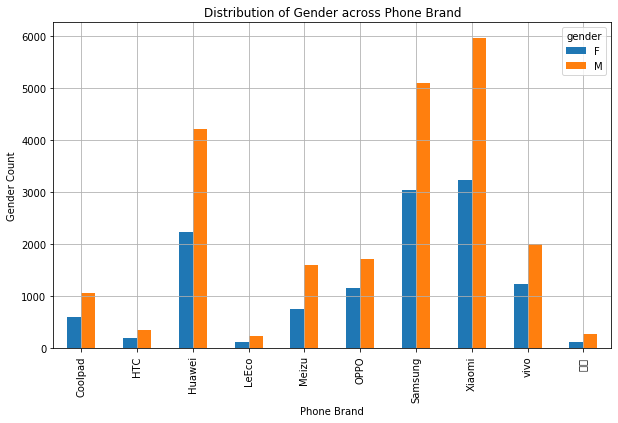

In [76]:

distribution_gender_across_phone_brand.pivot_table(index="EnglishBrandName", columns='gender', values='count', aggfunc='sum').plot.bar(grid = True, figsize = (10, 6))
plt.xlabel("Phone Brand")
plt.ylabel("Gender Count")
plt.title("Distribution of Gender across Phone Brand")
plt.show()

### 7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands).

Note: While doing analysis for the above points, consider only one instance of a particular User(device_id) as a User can do multiple phone calls and considering every instance of the same User can give misleading numbers.

### 7.1 Distribution of Age Segments across each State
For accomplishing this we need to merge two tables.

1. gender_age_train_data table <br>
2. filtered_events_data table

In [77]:

gender_age.head()

device_id gender  age   group
0  8076087639492063270      M   35  M32-38
1  2897161552818060146      M   35  M32-38
2  8260683887967679142      M   35  M32-38
3  4938849341048082022      M   30  M29-31
4   245133531816851882      M   30  M29-31

In [78]:
selectedStates.head()

event_id     device_id            timestamp longitude latitude  \
2197849   10117.0  5.323073e+18  2016-05-01 11:11:24   75.9395  22.7692   
2197850  112369.0  5.323073e+18  2016-05-04 22:47:19   75.9395  22.7692   
2197851  139098.0  5.323073e+18  2016-05-01 09:55:58   75.9395  22.7692   
2197852  190983.0  5.323073e+18  2016-05-04 22:51:03   75.9395  22.7692   
2197853  249507.0  5.323073e+18  2016-05-01 11:24:12   75.9395  22.7692   

           city          state  
2197849  Indore  MadhyaPradesh  
2197850  Indore  MadhyaPradesh  
2197851  Indore  MadhyaPradesh  
2197852  Indore  MadhyaPradesh  
2197853  Indore  MadhyaPradesh

#### Merge both the above table on device_id

In [84]:
# Mapping to correct Age-segment groups using below function in gender_age

gender_age['AgeSegment'] = gender_age.age.apply(lambda x:getAgeSegmentMapping(x))
gender_age.head()

device_id gender  age   group AgeSegment
0  8076087639492063270      M   35  M32-38      33-42
1  2897161552818060146      M   35  M32-38      33-42
2  8260683887967679142      M   35  M32-38      33-42
3  4938849341048082022      M   30  M29-31      29-32
4   245133531816851882      M   30  M29-31      29-32

In [85]:
# Merging both the above tables based on "inner" join
events_gender_age_report = pd.merge(selectedStates, gender_age, on = 'device_id', how='inner')
events_gender_age_report.head()

event_id     device_id            timestamp longitude latitude    city  \
0   10441.0  5.334703e+17  2016-05-03 11:25:00   75.9122  22.7319  Indore   
1   13461.0  5.334703e+17  2016-05-04 13:12:14   75.9122  22.7319  Indore   
2   18882.0  5.334703e+17  2016-05-03 17:15:16   75.9122  22.7319  Indore   
3   18997.0  5.334703e+17  2016-05-03 17:16:14   75.9122  22.7319  Indore   
4   43964.0  5.334703e+17  2016-05-04 12:45:37   75.9122  22.7319  Indore   

           state gender  age   group AgeSegment  
0  MadhyaPradesh      F   38  F33-42      33-42  
1  MadhyaPradesh      F   38  F33-42      33-42  
2  MadhyaPradesh      F   38  F33-42      33-42  
3  MadhyaPradesh      F   38  F33-42      33-42  
4  MadhyaPradesh      F   38  F33-42      33-42

In [86]:
#Distribution of Age Segment across states

distribution_of_age_segments_across_state = pd.DataFrame(events_gender_age_report.groupby("state")["AgeSegment"].value_counts().reset_index(name='count'))
distribution_of_age_segments_across_state

state AgeSegment  count
0      Chhattisgarh      33-42     35
1      Chhattisgarh      29-32     13
2      Chhattisgarh        22-      1
3      Chhattisgarh        43+      1
4               Goa        22-      7
5   JammuandKashmir        43+     63
6   JammuandKashmir      23-26     13
7   JammuandKashmir      27-28      2
8     MadhyaPradesh        43+    582
9     MadhyaPradesh      23-26    551
10    MadhyaPradesh      29-32    466
11    MadhyaPradesh      27-28    443
12    MadhyaPradesh      33-42    345
13    MadhyaPradesh        22-    246
14         Nagaland      33-42     54
15         Nagaland      29-32      2

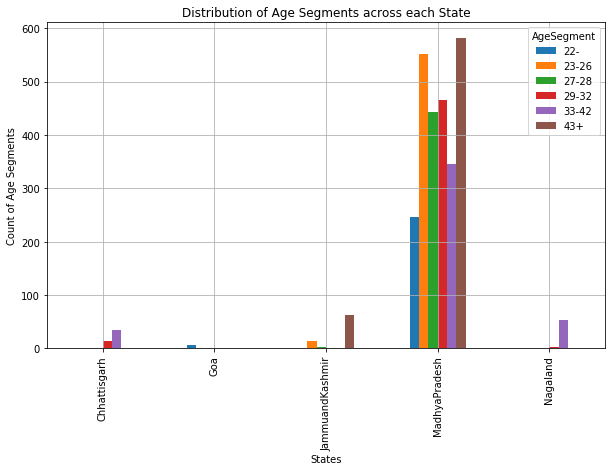

In [87]:
# PLotting on pivot table - Distribution of Age Segment across states

distribution_of_age_segments_across_state.pivot_table(index='state', columns='AgeSegment', values='count', aggfunc='sum').plot.bar(grid = True, figsize = (10, 6))
plt.xlabel("States")
plt.ylabel("Count of Age Segments")
plt.title("Distribution of Age Segments across each State")
plt.show()

#### 7.2 Distribution of Age Segments across Gender

In [88]:
gender_age.head()

device_id gender  age   group AgeSegment
0  8076087639492063270      M   35  M32-38      33-42
1  2897161552818060146      M   35  M32-38      33-42
2  8260683887967679142      M   35  M32-38      33-42
3  4938849341048082022      M   30  M29-31      29-32
4   245133531816851882      M   30  M29-31      29-32

In [89]:
#Distribution of Age Segment across gender

distribution_of_age_segments_across_gender= pd.DataFrame(gender_age.groupby("gender")["AgeSegment"].value_counts().reset_index(name='count'))
distribution_of_age_segments_across_gender

gender AgeSegment  count
0       F      33-42   5561
1       F      23-26   5291
2       F      29-32   4628
3       F        43+   4194
4       F        22-   3949
5       F      27-28   3118
6       M      33-42  10572
7       M      23-26   9605
8       M      29-32   9082
9       M        22-   7488
10      M        43+   5712
11      M      27-28   5445

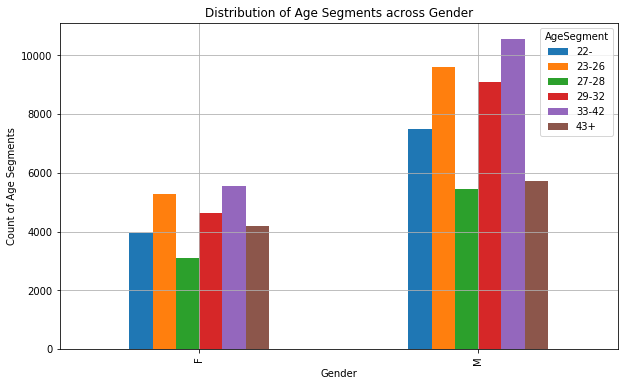

In [90]:
#Plotting the pivot table - Distribution of Age Segment across gender


distribution_of_age_segments_across_gender.pivot_table(index='gender', columns='AgeSegment', values='count', aggfunc='sum').plot.bar(grid = True, figsize = (10, 6))
plt.xlabel("Gender")
plt.ylabel("Count of Age Segments")
plt.title("Distribution of Age Segments across Gender")
plt.show()

#### 7.3 Distribution of Age Segments across Phone Brand

In [91]:
gender_Phone_brand.head()

device_id gender  age   group  Unnamed: 0 phone_brand  \
0   245133531816851882      M   30  M29-31       13110       SUGAR   
1   236877999787307864      M   36  M32-38       68989          酷派   
2   176515041953473526      M   33  M32-38       13112          华为   
3  1596610250680140042      F   36  F33-42       67545          三星   
4  9032155484127182494      M   31  M29-31       77024          华为   

  device_model EnglishBrandName AgeSegment  
0         时尚手机            SUGAR      29-32  
1           F2          Coolpad      33-42  
2        G610S           Huawei      33-42  
3    Galaxy S4          Samsung      33-42  
4       Mate 7           Huawei      29-32

In [92]:

distribution_of_age_segments_across_phone_brand = pd.DataFrame(gender_Phone_brand.groupby("EnglishBrandName")["AgeSegment"].value_counts().reset_index(name='count'))

distribution_of_age_segments_across_phone_brand

EnglishBrandName AgeSegment  count
0            Coolpad      33-42    380
1            Coolpad      23-26    326
2            Coolpad      29-32    286
3            Coolpad        22-    241
4            Coolpad        43+    239
5            Coolpad      27-28    186
6                 E派        22-      2
7                 E派      33-42      2
8                HTC      33-42    119
9                HTC      23-26    112
10               HTC      29-32    101
11               HTC        22-     96
12               HTC        43+     73
13               HTC      27-28     56
14            Huawei      33-42   1507
15            Huawei      29-32   1270
16            Huawei      23-26   1205
17            Huawei        43+    946
18            Huawei        22-    837
19            Huawei      27-28    679
20                LG      23-26     36
21                LG      33-42     36
22                LG      29-32     30
23                LG      27-28     26
24                LG        43+     23
25                LG        22-     11
26              LOGO      33-42      4
27              LOGO      27-28      2
28              LOGO        43+      2
29              LOGO        22-      1
..               ...        ...    ...
378             酷比魔方      27-28      2
379               酷珀      33-42      3
380               酷珀      27-28      2
381               酷珀      29-32      2
382               酷珀        22-      1
383               锤子      29-32     31
384               锤子      23-26     25
385               锤子        22-     22
386               锤子      33-42     20
387               锤子        43+     15
388               锤子      27-28     14
389               长虹        22-      2
390               长虹      23-26      2
391               长虹      27-28      1
392               长虹      33-42      1
393               青橙        22-      2
394               青橙      27-28      2
395               青橙      23-26      1
396               青橙      29-32      1
397               青葱      23-26      1
398               青葱      29-32      1
399              飞利浦        22-      1
400              飞利浦      33-42      1
401               飞秒      33-42      2
402               鲜米        22-      1
403               黑米      33-42      4
404               黑米      23-26      3
405               黑米      27-28      3
406               黑米      29-32      2
407               黑米        43+      2

[408 rows x 3 columns]

In [93]:
# Filtering the Age Segment distrubtion across top 10 phone brands

distribution_AgeSegment_across_phone_brand = pd.DataFrame()
for index,value in enumerate(top_brands_list):
    distribution_AgeSegment_across_phone_brand=distribution_of_age_segments_across_phone_brand[distribution_of_age_segments_across_phone_brand.EnglishBrandName.isin(top_brands_list)]

distribution_AgeSegment_across_phone_brand

EnglishBrandName AgeSegment  count
0            Coolpad      33-42    380
1            Coolpad      23-26    326
2            Coolpad      29-32    286
3            Coolpad        22-    241
4            Coolpad        43+    239
5            Coolpad      27-28    186
8                HTC      33-42    119
9                HTC      23-26    112
10               HTC      29-32    101
11               HTC        22-     96
12               HTC        43+     73
13               HTC      27-28     56
14            Huawei      33-42   1507
15            Huawei      29-32   1270
16            Huawei      23-26   1205
17            Huawei        43+    946
18            Huawei        22-    837
19            Huawei      27-28    679
31             LeEco      33-42     77
32             LeEco      29-32     76
33             LeEco      23-26     75
34             LeEco        22-     45
35             LeEco        43+     45
36             LeEco      27-28     40
42             Meizu      23-26    539
43             Meizu        22-    450
44             Meizu      33-42    431
45             Meizu      29-32    399
46             Meizu      27-28    294
47             Meizu        43+    240
48              OPPO      23-26    607
49              OPPO        22-    549
50              OPPO      33-42    534
51              OPPO      29-32    507
52              OPPO      27-28    353
53              OPPO        43+    324
56           Samsung      33-42   1868
57           Samsung      29-32   1543
58           Samsung      23-26   1514
59           Samsung        43+   1222
60           Samsung        22-   1048
61           Samsung      27-28    928
68            Xiaomi      23-26   1930
69            Xiaomi      33-42   1924
70            Xiaomi      29-32   1708
71            Xiaomi        22-   1390
72            Xiaomi        43+   1154
73            Xiaomi      27-28   1089
80              vivo      23-26    712
81              vivo      33-42    632
82              vivo        22-    625
83              vivo      29-32    564
84              vivo        43+    370
85              vivo      27-28    338
316              联想       23-26     88
317              联想       33-42     75
318              联想       29-32     69
319              联想         22-     65
320              联想         43+     65
321              联想       27-28     43

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 32852 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24819 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 32852 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24819 missing from current font.
  font.set_text(s, 0, flags=flags)


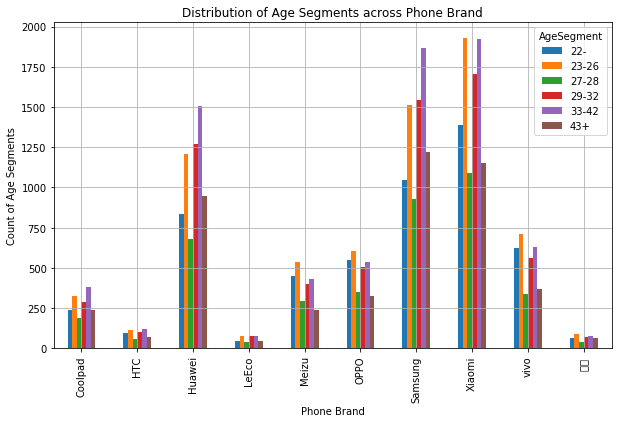

In [94]:
# PLotting Pivot Table - Distribution of Age Segment across phone brand

distribution_AgeSegment_across_phone_brand.pivot_table(index="EnglishBrandName", columns='AgeSegment', values='count', aggfunc='sum').plot.bar(grid = True, figsize = (10, 6))
plt.xlabel("Phone Brand")
plt.ylabel("Count of Age Segments")
plt.title("Distribution of Age Segments across Phone Brand")
plt.show()

### 8. Hourly distribution of Phone Calls.

In [110]:

selectedStates['date'] = pd.to_datetime(selectedStates['timestamp'], infer_datetime_format = True)
selectedStates['hour'] = selectedStates.date.dt.strftime('%Y%m%d%H')
selectedStates.head()

event_id     device_id            timestamp longitude latitude  \
2197849   10117.0  5.323073e+18  2016-05-01 11:11:24   75.9395  22.7692   
2197850  112369.0  5.323073e+18  2016-05-04 22:47:19   75.9395  22.7692   
2197851  139098.0  5.323073e+18  2016-05-01 09:55:58   75.9395  22.7692   
2197852  190983.0  5.323073e+18  2016-05-04 22:51:03   75.9395  22.7692   
2197853  249507.0  5.323073e+18  2016-05-01 11:24:12   75.9395  22.7692   

           city          state                date        hour  
2197849  Indore  MadhyaPradesh 2016-05-01 11:11:24  2016050111  
2197850  Indore  MadhyaPradesh 2016-05-04 22:47:19  2016050422  
2197851  Indore  MadhyaPradesh 2016-05-01 09:55:58  2016050109  
2197852  Indore  MadhyaPradesh 2016-05-04 22:51:03  2016050422  
2197853  Indore  MadhyaPradesh 2016-05-01 11:24:12  2016050111

In [111]:
hourly_data = selectedStates.hour.value_counts().reset_index().sort_values("index")
hourly_data.rename(columns={"index": "Date", "hour": "CallVolume"}, inplace=True)
hourly_data.head()

Date  CallVolume
168  2016043023          58
122  2016050100        1155
136  2016050101         667
149  2016050102         509
155  2016050103         395

Text(0.5, 0, 'Hour')

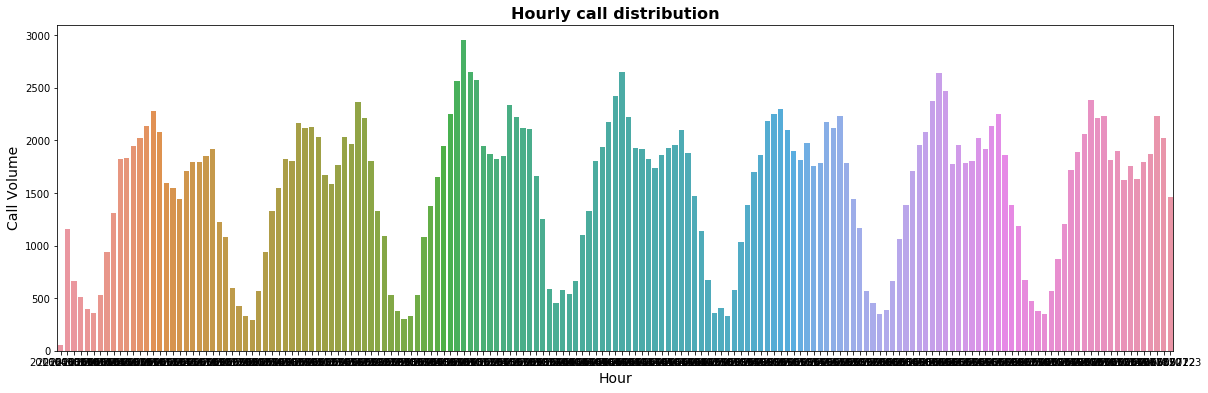

In [112]:
# PLotting Hourly distribution 

fig, ax = plt.subplots(figsize=(20,6), ncols=1, nrows=1)
fig.patch.set_alpha(1)
ax.set_title("Hourly call distribution", fontsize=16, fontweight="bold")
ax.patch.set_alpha(0)

call_dist = sns.barplot(x="Date", y="CallVolume", data=hourly_data)

call_dist.set_ylabel('Call Volume', fontsize=14 )
call_dist.set_xlabel('Hour', fontsize=14)

#### Install plotly for interactive chart

In [100]:
!pip install plotly

  Stored in directory: C:\Users\kaurh\AppData\Local\pip\Cache\wheels\d7\a9\33\acc7b709e2a35caa7d4cae442f6fe6fbf2c43f80823d46460c
Successfully built retrying


In [101]:
import plotly.express as px
hourly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 168 to 106
Data columns (total 2 columns):
Date          169 non-null object
CallVolume    169 non-null int64
dtypes: int64(1), object(1)
memory usage: 9.0+ KB


In [102]:

fig = px.bar(hourly_data, x='Date', y='CallVolume',
             hover_data=['Date', 'CallVolume'], color='CallVolume',
             labels={'pop':'Hourly call distribution'}, title='Hourly call distribution', height=500, width=800)
fig.show()

### 9. Plot the Users on the Map using any suitable package.

- Stack chart for Age segment (bar) vs phone brand (multi rows)
- Phone brand vs state
- Stack chart for phone brand (bar) vs gender (multi rows)

Here is the Task for Week 3:

1. Do Analysis on the preprocessed Data.

Here are the points about how Analysis should be done:

1. Distribution of Users(device_id) across States.

2. Distribution of Users across Phone Brands(Consider only 10 Most used Phone Brands).

3. Distribution of Users across Gender.

4. Distribution of Users across Age Segments.

5. Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for each Age Segment, State, Gender.

6. Distribuiion of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands).

7. Distribution of Age Segments for each State, Gender and Phone Brand(Consider only 10 Most used Phone Brands).


Note: While doing analysis for the above points, consider only one instance of a particular User(device_id) as a User can do multiple phone calls and considering every instance of the same User can give misleading numbers.

8. Hourly distribution of Phone Calls.

9. Plot the Users on the Map using any suitable package.

Note: Do not open the Data in Excel. Doing so will corrupt the Data and will be problematic while uploading the Data into Database. You can examine the Data by opening in a Text Editor(Notepad, EditPlus, Notepad++ etc).
